<a href="https://colab.research.google.com/github/caffonso/Control/blob/main/Control8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fisrt order system


## 1  Electrical system

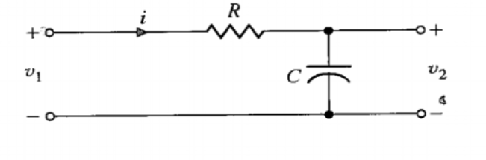

$v_{1}: input$

$v_{2}: output$

*Kirchhof law*

$ v_{1} = r.i(t) + \frac{1}{c}\int \! i(t) \, \mathrm{d}t$

$ v_{2} =  \frac{1}{c}\int \! i(t) \, \mathrm{d}t$

but

$V(s) = \mathcal{L}(v(t))$ ; $  I(s) = \mathcal{L}(i(t)) $

$\mathcal{L}(\int \! i(t) \, \mathrm{d}t) = \frac{1}{s}I$

then

$ V_{1} =  rI + \frac{1}{sc}I = I(r + \frac{1}{sc} )$

$ V_{2} =  \frac{1}{sc}I$

Transfer function

$ G(s) = \frac{V_{2}}{V_{1}} = \frac {1}{RCs + 1}$

Output

$ V_{2}(s) = G(s).V_{1}(s) $

back to time:

$v_{2}(t) =  \mathcal{L}^{-1}(G(s).V_{1}(s))$

In [ ]:
import sympy
import matplotlib.pyplot as plt
import numpy
sympy.init_printing()
%matplotlib inline

In [ ]:
R, C, = sympy.symbols('R,C',real=True, positive=True)
t, s = sympy.symbols('t, s')

In [ ]:
# trnafer function
G = 1/(R*C*s + 1)
G

In [ ]:
sympy.solve(R*C*s + 1,s)

In [ ]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

## 2. Roots: Pols and zeros

$ G(s) = \frac{A(s)}{B(s)}$

$A(s) = K(s-z_{1})(s-z_{2})...(s-z_{m})$

$B(s) = (s-p_{1})(s-p_{2})...(s-p_{n})$

$zeros: z_{1},z_{2},...,z_{m}$

$polos: p_{1},p_{2},...,p_{m}$

Example:

$ G(s) = \frac{4(s+5)}{s^{2}+2s+10}$



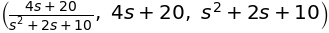

In [ ]:
G = 4*(s+5)/(s**2+2*s+10)
A = sympy.numer(G)
B = sympy.denom(G)
G,A,B

In [ ]:
## roots
z = sympy.solve(A,s)
p = sympy.solve(B,s)
z,p

In [ ]:
sympy.re(p[0]),sympy.im(p[0])

In [ ]:
def showRoots(z,p):
  plt.title("Complex Roots")
  for i in range(len(z)):
    plt.scatter(sympy.re(z[i]),sympy.im(z[i]), marker='o',color = "blue")
  for i in range(len(p)): 
    plt.scatter(sympy.re(p[i]),sympy.im(p[i]), marker='X', color = "red")
  plt.ylabel("j") 
  plt.xlabel('R')  
  plt.axhline(0, color='black')
  plt.axvline(0, color='black')
  plt.show()

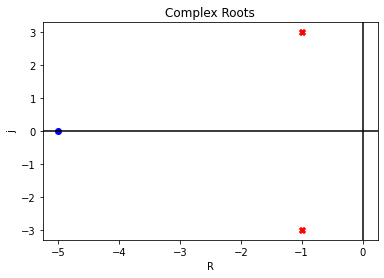

In [ ]:
showRoots(z,p)

## 2 Input

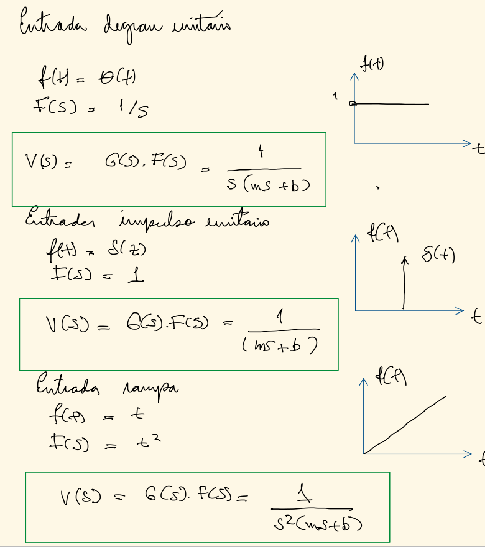

### 2.1 Imput: *Step Unit*

$ f(t) = \theta(t) $ 

$F(s) = 1/s$


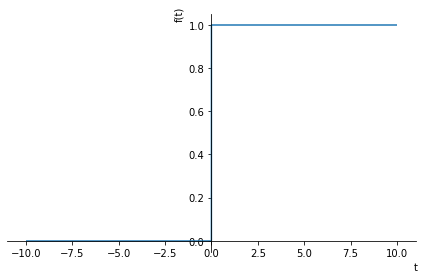

In [ ]:
# Input: 
f = sympy.Heaviside(t)
sympy.plot(f)
F = L(f)
f,F

Output:

$V(s) = G(s).F(s) = \frac{\mathrm{1}}{\mathrm{s(1 + RC.s)}}$

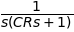

In [ ]:
G = 1/(R*C*s+1)
F = 1/s
V = G*F
V

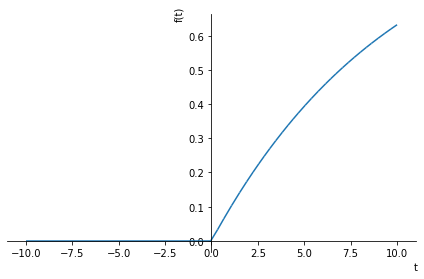

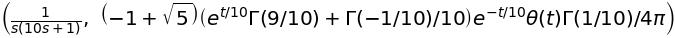

In [ ]:
R = 2
C = 5
G = 1/(1+R*C*s)
V = G*F
v = invL(V)
sympy.plot(v)
V,v

### 2.2 Imput: *impult unit*

$ f(t) = \delta(t) $ 

$F(s) = 1$


Output:

$V(s) = G(s).F(s) = \frac{\mathrm{1}}{\mathrm{1 + RC.s}}$

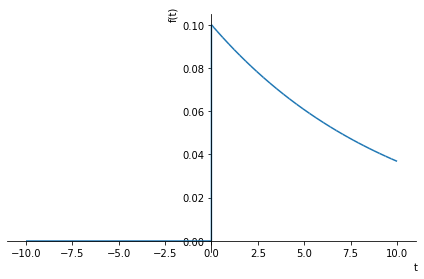

In [ ]:
R = 2
C = 5
G = 1/(1+R*C*s)
F = 1
V = G*F
v = invL(V)
sympy.plot(v)
V,v

### 2.3 Input: *ramp*

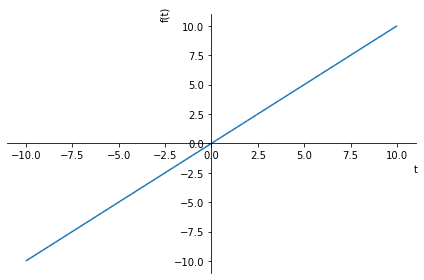

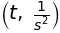

In [ ]:
f = t
F = L(f)
sympy.plot(f)
f,F

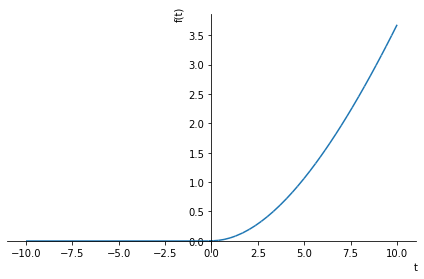

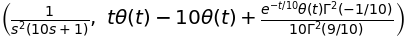

In [ ]:

V = G*F
v = invL(V)
sympy.plot(v)
V,v

## 3 General Form

By convention, we usually rewrite the above in the following form, for reasons which will become apparent soon:

$ G(s) = \frac{\mathrm{K}}{\mathrm{1 + \tau.s}} $ 

In [ ]:
K, tau, = sympy.symbols('K,tau',real=True, positive=True)
G = K/(tau*s + 1)
G

The inverse laplace of a transfer function is its impulse response

In [ ]:
from ipywidgets import interact

def impulse(K,tau):
  G = K/(1+tau*s)
  v = invL(G*1)
  sympy.plot(v,xlim=(-2.5, 10), ylim=(0, 2))
  return v

def step(K,tau):
  G = K/((1+tau*s))
  v = invL(G/s)
  sympy.plot(v,xlim=(-2.5, 10), ylim=(0, 8))
  return v  
  
def ramp(K,tau):
  G = K/(1+tau*s)
  v = invL(G/s**2)
  sympy.plot(v,xlim=(-2.5, 10), ylim=(0, 8))
  return v   

In [ ]:
interact(impulse, K =(0, 10), tau =(0, 10))


interactive(children=(IntSlider(value=5, description='K', max=10), IntSlider(value=5, description='tau', max=1…

<function __main__.impulse>

In [ ]:
interact(step, K =(0, 10), tau =(0, 3))


interactive(children=(IntSlider(value=5, description='K', max=10), IntSlider(value=1, description='tau', max=3…

<function __main__.step>

In [ ]:
interact(ramp, K =(0, 10), tau =(0, 3))


interactive(children=(IntSlider(value=5, description='K', max=10), IntSlider(value=1, description='tau', max=3…

<function __main__.ramp>

Exploration of the above interaction allows us to see the following:

* $K$ scales the response in the $y$ direction
* $\tau$ scales the response in the $t$ direction
* The response of the system is always $0.63K$ when $t=\tau$

We get the "magic number" 0.63 by substituting $t=\tau$ into the response:

## Atividades

1. Considere quadripolo a seguir, onde 

$ R = 500k \Omega $

$ C = 1.5\mu  F$

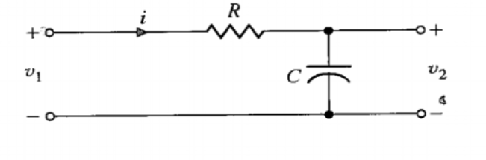

Encontre a tensão $v_{2}(t)$ para uma entrada $v_{1}(t)$ impulso unitário:

*Equacionamento:*

$ R = 500K \Omega$

$ C = 1.5 \mu F $

$ F  = 1$

$ G = \frac{\mathrm{1}}{\mathrm{1 + RC.s}} $ 


$ V = G.F$


$v =  \mathcal{L}^{-1}(G.F)$

*plotat v*


In [ ]:
## coloque seu codigo aqui


*saida esperda*

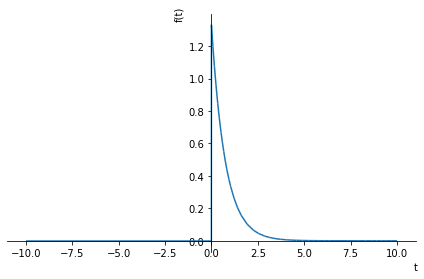

2. Altere o valor da resistência R de forma que $v_{o}(0)< 0.5V$ qual o mínimo valor desta nova resistência ?            
*(utilize o gráfico a seguir para responder)*


In [ ]:
interact(impulse, K =(1, 1), tau =(0, R*C))


interactive(children=(IntSlider(value=1, description='K', max=1, min=1), IntSlider(value=5, description='tau',…

<function __main__.impulse>

Resp. 


3. Encontre as raizes e zeros das funcões, e coloque no plano complexo.


1.
$
    \ F(s) = \frac{4(s+1)}{s^{2} + 10s +21}
$

2.
$
    \ F(s) = \frac{s - 4}{s^{2} + 16}
$

3.
$
    \ F(s) = \frac{12}{s(s+3)(s+4)}
$

*use showRoots(z,p)*

In [ ]:
# coloque seu codigo aqui


*saída esperada*

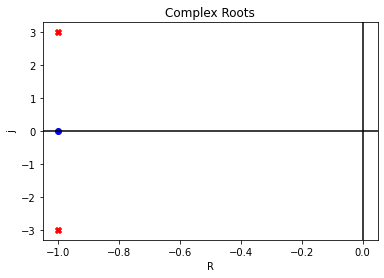